# Installing Packages

In [490]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

%matplotlib inline

# Data Gathering

In [491]:
# load the dataset 
ford = pd.read_csv('fordgobike_tripdata.csv')


# Introduce the dataset

In [492]:
# overview of data shape and composition
print(ford.shape)
print(ford.dtypes)


(183412, 16)
duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object


In [493]:
ford.member_gender.unique()

array(['Male', nan, 'Other', 'Female'], dtype=object)

In [494]:
ford.user_type.value_counts()

Subscriber    163544
Customer       19868
Name: user_type, dtype: int64

In [495]:
ford.isnull()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183408,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183409,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
183410,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [496]:
ford.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [497]:
sum(ford.duplicated())

0

In [498]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


# What is the structure of your dataset?

The dataset have(183412) and  (16) columns<br/>
duration_sec                 int64 <br/>
start_time                  object<br/>
end_time                    object<br/>
start_station_id           float64<br/>
start_station_name          object<br/>
start_station_latitude     float64<br/>
start_station_longitude    float64<br/>
end_station_id             float64<br/>
end_station_name            object<br/>
end_station_latitude       float64<br/>
end_station_longitude      float64<br/>
bike_id                      int64<br/>
user_type                   object<br/>
member_birth_year          float64<br/>
member_gender               object<br/>
bike_share_for_all_trip     object<br/>

# Clean Datasets

In [499]:
# make a copy of the datasets
ford_clean = ford.copy()

In [500]:
# Change the datatype of some columns

ford_clean['start_time'] = pd.to_datetime(ford_clean.start_time, format="%Y-%m-%d %H:%M:%S")
ford_clean['end_time'] = pd.to_datetime(ford_clean.end_time, format="%Y-%m-%d %H:%M:%S")
 
ford_clean['bike_id'] = ford_clean['bike_id'].astype(object)

In [501]:
#Convert the member_birth_year to int
ford_clean['member_birth_year'] = pd.to_numeric(ford_clean['member_birth_year'], errors='coerce')
ford_clean = ford_clean.dropna(subset=['member_birth_year'])
ford_clean['member_birth_year'] = ford_clean['member_birth_year'].astype(int)

In [502]:
#Convert the start_station_id and end_station_id to int

ford_clean['end_station_id'] = pd.to_numeric(ford_clean['end_station_id'], errors='coerce')
ford_clean = ford_clean.dropna(subset=['end_station_id'])
ford_clean['end_station_id'] = ford_clean['end_station_id'].astype(int)


In [503]:
#Convert the start_station_id to int
ford_clean['start_station_id'] = pd.to_numeric(ford_clean['start_station_id'], errors='coerce')
ford_clean = ford_clean.dropna(subset=['start_station_id'])
ford_clean['start_station_id'] = ford_clean['start_station_id'].astype(int)

https://stackoverflow.com/questions/47333227/pandas-valueerror-cannot-convert-float-nan-to-integer

In [504]:
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

___________________________________________

In [505]:
ford_clean['start_time'].describe()

count                         174952
unique                        174941
top       2019-02-07 17:56:08.897000
freq                               2
first     2019-02-01 00:00:20.636000
last      2019-02-28 23:59:18.548000
Name: start_time, dtype: object

In [506]:
ford_clean['end_time'].describe()

count                         174952
unique                        174939
top       2019-02-28 17:40:37.328000
freq                               2
first     2019-02-01 00:04:52.058000
last      2019-03-01 08:01:55.975000
Name: end_time, dtype: object

In [507]:
#create new columns (trip_year,trip_month,trip_day,trip_hour)
ford_clean['trip_year'] = ford_clean.start_time.dt.strftime('%y')
ford_clean['trip_month'] = ford_clean.start_time.dt.strftime('%b')
ford_clean['trip_day'] = ford_clean.start_time.dt.strftime('%a')
ford_clean['trip_hour'] = ford_clean.start_time.dt.strftime('%H')

In [508]:
ford_clean['visit_yr'] = ford_clean.groupby(['bike_id', 'trip_year']).cumcount()+1


In [509]:
ford_clean['visit_yr']

0           1
2           1
3           1
4           1
5           1
         ... 
183407    131
183408    128
183409     77
183410     72
183411     31
Name: visit_yr, Length: 174952, dtype: int64

In [510]:
#create new column (age)
ford_clean['age'] = datetime.now().year - ford_clean.member_birth_year


In [511]:
# drop unncecessary columns no  need for them in analysis 
ford_clean = ford_clean.drop(['member_birth_year','start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude','start_time', 'end_time','bike_share_for_all_trip'], axis=1)

In [512]:
ford_clean.age.value_counts()

33     10214
28      9323
32      8967
31      8640
30      8484
       ...  
94         1
93         1
111        1
91         1
143        1
Name: age, Length: 75, dtype: int64

In [513]:
#drop age outlire (142 and 110)
ford_clean.drop(ford_clean[ford_clean.age >100].index, inplace = True)

In [514]:
# Change the datatype of some columns to category type

ford_clean.trip_year = ford_clean.trip_year.astype('category')

ford_clean.trip_month = ford_clean.trip_month.astype('category')
ford_clean.trip_day = ford_clean.trip_day.astype('category')


In [515]:
 #drop null values in gender column
ford_clean.dropna(inplace=True)
ford_clean[ford_clean.member_gender.isnull()]
ford_clean.member_gender.unique()

array(['Male', 'Other', 'Female'], dtype=object)

In [516]:
 #drop null values
ford_clean.dropna(inplace=True)
ford_clean[ford_clean.age.isnull()]
ford_clean.age.unique()

array([37, 49, 32, 47, 62, 38, 33, 29, 25, 28, 31, 40, 46, 43, 30, 24, 35,
       21, 39, 26, 41, 48, 36, 50, 42, 54, 23, 27, 44, 22, 34, 52, 58, 45,
       57, 56, 60, 53, 55, 59, 67, 63, 61, 51, 65, 64, 76, 69, 73, 70, 80,
       71, 72, 68, 66, 75, 74, 90, 78, 79, 88, 20, 77, 93, 87, 82, 91, 83,
       94])

In [517]:
ford_clean.isnull().sum()

duration_sec          0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
bike_id               0
user_type             0
member_gender         0
trip_year             0
trip_month            0
trip_day              0
trip_hour             0
visit_yr              0
age                   0
dtype: int64

In [518]:
# add acolumn for age_classifier
def age_classifier(age):
    if age >= 0 and age <18:
        return "Kids"
    elif age >= 18 and age < 37:
        return "Adults"
    elif age >= 37 and age < 55:
        return "Matures"
    else:
        return "Elders"

ford_clean["age_group"] = ford_clean["age"].apply(age_classifier)

In [519]:
ford_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174877 entries, 0 to 183411
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   duration_sec        174877 non-null  int64   
 1   start_station_id    174877 non-null  int32   
 2   start_station_name  174877 non-null  object  
 3   end_station_id      174877 non-null  int32   
 4   end_station_name    174877 non-null  object  
 5   bike_id             174877 non-null  object  
 6   user_type           174877 non-null  object  
 7   member_gender       174877 non-null  object  
 8   trip_year           174877 non-null  category
 9   trip_month          174877 non-null  category
 10  trip_day            174877 non-null  category
 11  trip_hour           174877 non-null  object  
 12  visit_yr            174877 non-null  int64   
 13  age                 174877 non-null  int32   
 14  age_group           174877 non-null  object  
dtypes: category(3), i

In [520]:
# convert some columns into ordered categorical types
ordinal_var_dict = {'member_gender': ['Male','Other','Female']
                    ,'age_group':[ 'Kids','Adults','Matures','Elders']
                    ,'user_type':['Subscriber','Customer']
                   }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    ford_clean[var] = ford_clean[var].astype(ordered_var)

In [521]:
ford_clean.head(1)

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,trip_year,trip_month,trip_day,trip_hour,visit_yr,age,age_group
0,52185,21,Montgomery St BART Station (Market St at 2nd St),13,Commercial St at Montgomery St,4902,Customer,Male,19,Feb,Thu,17,1,37,Matures


# What is the structure of your dataset after clean?


1-The datasets 174880 rows × 15 columns.<br/>
duration_sec  <br/>       
   start_station_id    <br/>   
    start_station_name  <br/> 
    end_station_id      <br/>   
    end_station_name    <br/> 
    bike_id             <br/> 
    user_type           <br/> 
    member_gender       <br/> 
    trip_year           <br/> 
    trip_month          <br/> 
   trip_day            <br/> 
   trip_hour           <br/>  
   visit_yr            <br/>   
   age                 <br/>   
  age_group <br/> 




# What is/are the main feature(s) of interest in your dataset?


The main interset of the dataset are Trip Duration , User Type  , Age , Gender ,Day of the week and the name of city depends on user type,age and gender.

# What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I thinks the duration, day and hour of the trip  are importent for comparing with other factors like gender,age and user type.

# Visualizations

# Univariate plots (investigate the distributions of some variables individually.)

**Duration**

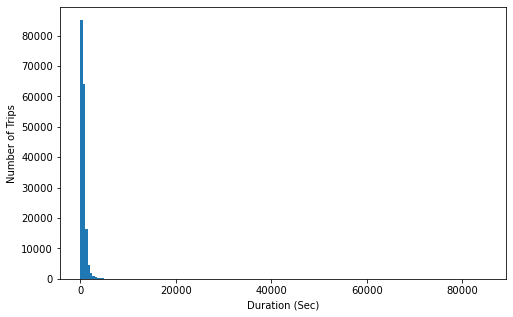

In [522]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, ford_clean['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_clean, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (Sec)')
plt.ylabel('Number of Trips')
plt.show()

lets use log scale beacouse There is a long tail in the distribution .

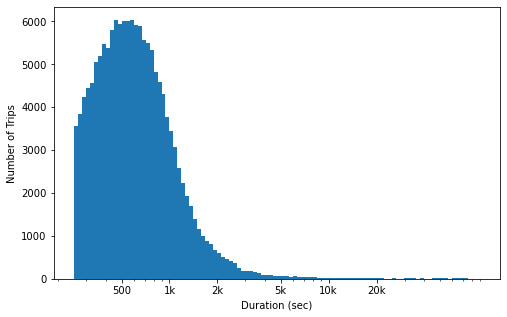

In [523]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(ford_clean['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = ford_clean, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1k', '2k', '5k', '10k', '20k'])
plt.ylabel('Number of Trips')
plt.xlabel('Duration (sec)')
plt.show()

Most of the  duration values of trips are 1000 seconds .The pack of value is around 500 sec. 

**Day_trip**

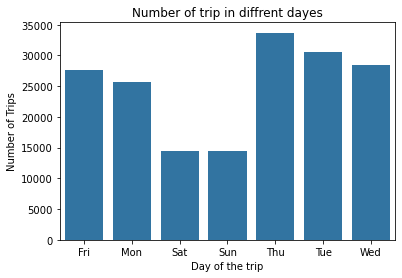

In [524]:
#weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
#weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
#ford_clean['trip_day'] = ford_clean['trip_day'].astype(weekdaycat)
sb.countplot(data=ford_clean, x='trip_day', color=sb.color_palette()[0]);
plt.xlabel('Day of the trip')
plt.ylabel('Number of Trips')
plt.title('Number of trip in diffrent dayes');

weekdays have way more trips than the weekends

**Hour Trip**

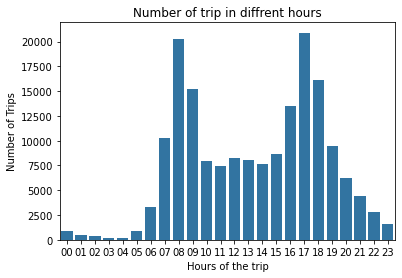

In [525]:
sb.countplot(data=ford_clean, x='trip_hour', color=sb.color_palette()[0]);
plt.xlabel('Hours of the trip')
plt.ylabel('Number of Trips')
plt.title('Number of trip in diffrent hours');

The hours 8-9 and 17-18 have more trips than the others hours.

**User type**

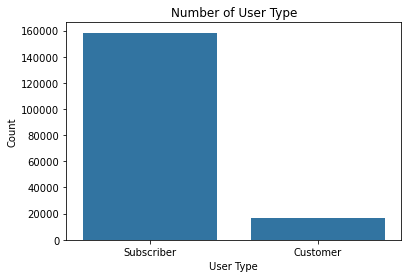

In [526]:
sb.countplot(data=ford_clean, x='user_type', color=sb.color_palette()[0]);
plt.xlabel('User Type');
plt.ylabel('Count');
plt.title('Number of User Type');

Most of the users are subscriber.

**Age**

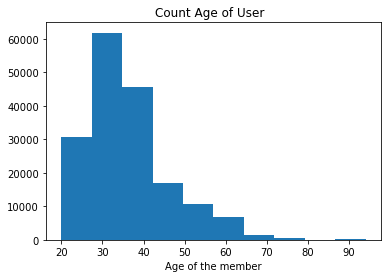

In [527]:
plt.hist(data=ford_clean, x='age', color=sb.color_palette()[0]);
plt.xlabel('Age of the member');
plt.title('Count Age of User  ');

the distruption show normal most points were between 28 to 40 years.


**Age_group**

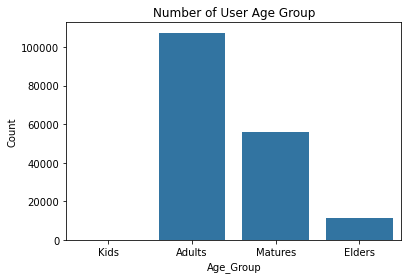

In [528]:
sb.countplot(data=ford_clean, x='age_group', color=sb.color_palette()[0]);
plt.xlabel('Age_Group');
plt.ylabel('Count');
plt.title('Number of User Age Group');

Most of the users are Adult

**Gender**

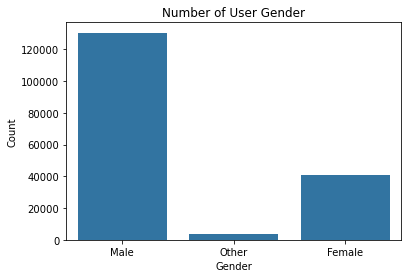

In [529]:
sb.countplot(data=ford_clean, x='member_gender', color=sb.color_palette()[0]);
plt.xlabel('Gender');
plt.ylabel('Count');
plt.title('Number of User Gender');


Most of the users are Male 

**Top 20city Name**

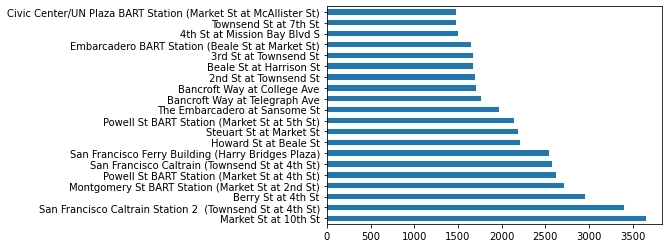

In [530]:
#freq_station = ford_clean.start_station_name.value_counts()
#y = freq_station.values[0:20] 
#x = freq_station.index[0:20]
#plt.barh(x,ford_clean[x],color=sb.color_palette()[0])

ford_clean['start_station_name'].value_counts()[:20].plot(kind='barh')


Top station name is Market ST at 10th St

https://mode.com/python-tutorial/counting-and-plotting-in-python/

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Most of the  duration values of trips are 1000 seconds and  on weekdays.In Addition most of trip are on 8-9 and 17-18  hours on day.The trips users are  subscriber, thier age around 28-40 ( Adult) and they are Male.Also, the top station name is Market ST at 10th St<br/>
No transformation was needed, the data is clear.

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


I use log scale in duration beacouse There is a long tail in the distribution .Also I created many columns in data to be more clear like day_trip, hour_trip, age_classifier.

# Bivariate Exploration (investigate the distributions of tow variables .)

1-Trip duration and Age <br/>
2-Trip duration and User type <br/>
3- Trip duration and gender <br/>
4-Trip day with duration in min <br/>
5-Member Gender and Age group <br/>
6-User Type and Member Gender<br/>
7-User type and top station_name<br/>

**1-Age with Duration**

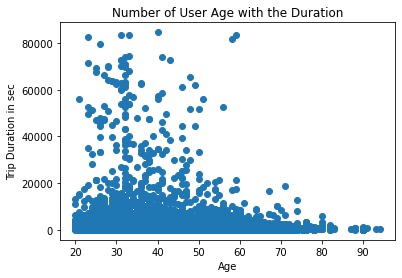

In [531]:
plt.scatter(data=ford_clean, x='age', y='duration_sec', color=sb.color_palette()[0]);
plt.xlabel('Age');
plt.ylabel('Trip Duration in sec');
plt.title('Number of User Age with the Duration');

As most of the durations are below 60000 and age is below 80, lets crop the plot till those values.

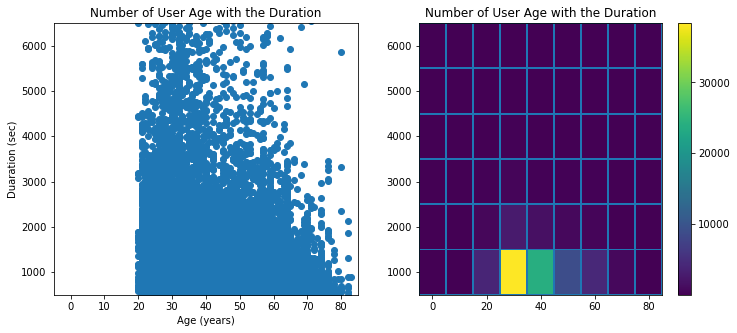

In [532]:
plt.figure(figsize=[12,5])

plt.subplot(1, 2, 1)
plt.scatter(data=ford_clean, x='age', y='duration_sec', color=sb.color_palette()[0])
plt.axis([-5, 85, 500, 6500])
plt.xlabel('Age (years)')
plt.ylabel('Duaration (sec)')
plt.title('Number of User Age with the Duration');
plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d(data=ford_clean, x='age', y='duration_sec', color=sb.color_palette()[0],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.title('Number of User Age with the Duration');
plt.show()


By looking at these graphs we can say that most usually users  bikes are  between 30 and 40. Higher duration time is clocked by younger members.



**2-User type and duration**


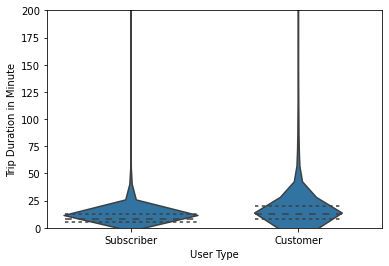

In [533]:
# Change duration from second to minutes 

ford_clean['duration_min'] = ford_clean['duration_sec'] / 60
plt.ylim([0,200])
sb.violinplot(data=ford_clean, x='user_type', y='duration_min', color=sb.color_palette()[0], inner='quartile');
plt.xlabel('User Type');
plt.ylabel('Trip Duration in Minute');


The trip duration distribution is narrower for customer than subscriber.It provide that the subscribers use the bikes more usually.

**3-Trip duration and gender**

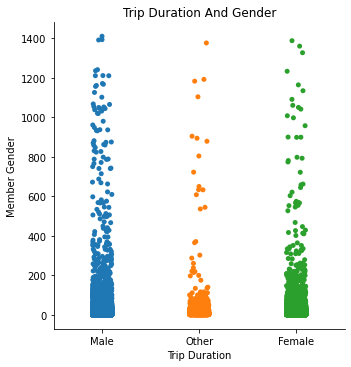

In [534]:

sb.catplot(x="member_gender", y="duration_min", data=ford_clean)
plt.xlabel('Trip Duration')
plt.ylabel('Member Gender');

plt.title('Trip Duration And Gender');


Male have long trip duration

**4-Trip day and duration**

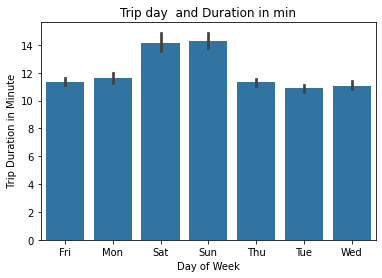

In [535]:


sb.barplot(data=ford_clean, x='trip_day', y='duration_min', color=sb.color_palette()[0]);
plt.xlabel('Day of Week');
plt.ylabel(' Trip Duration in Minute');
plt.title('Trip day  and Duration in min');

Trip duration in weekend is higher than week day 

**5-User Gender and Age group**

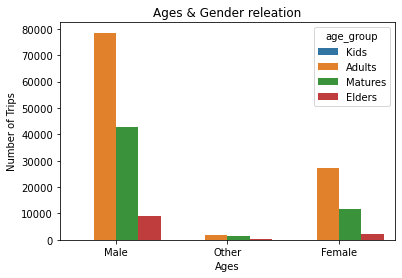

In [536]:
sb.countplot(data = ford_clean, x = 'member_gender', hue = 'age_group');

plt.xlabel('Ages');
plt.title('Ages & Gender releation');
plt.ylabel('Number of Trips');

As show from the The bar chart  the relationship between the gender  and  age_classfier, its present that males use bick more than females in all  age_classfier.



**6-User type and gender**

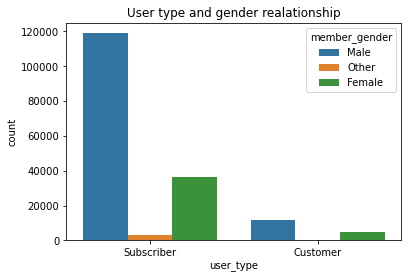

In [537]:
sb.countplot(data=ford_clean, x='user_type', hue='member_gender')
plt.title('User type and gender realationship');

Most of the users are subscriber and male.

**7-User type and top station_name**

In [538]:
#select user based on type 
df_subs = ford_clean.query('user_type == "Subscriber" ').start_station_name.value_counts()
df_cust = ford_clean.query('user_type == "Customer"').start_station_name.value_counts()
# select 20 top station name of each type
freq_station = ford_clean.start_station_name.value_counts()
y = freq_station.values[0:20] 
x = freq_station.index[0:20]

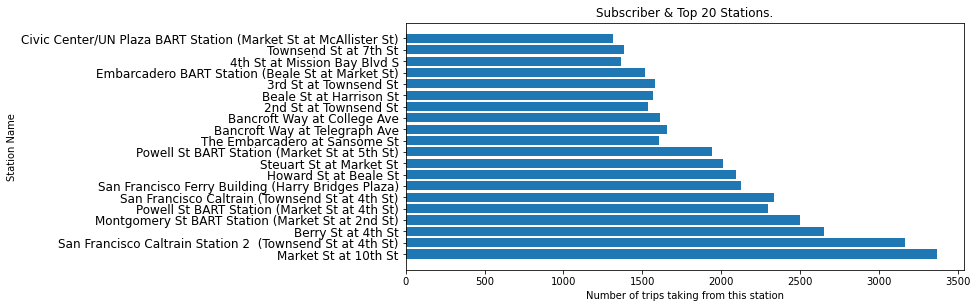

In [539]:
x_subs = df_subs.index[0:20] 
y_subs = df_subs.values[0:20] 

x_cus = df_cust.index[0:20] 
y_cus = df_cust.values[0:20] 

plt.figure(figsize = [10, 10]) 

plt.subplot(2,1,1)
plt.barh(x,df_subs[x],color=sb.color_palette()[0])
plt.yticks(fontsize=12)
plt.title('Subscriber & Top 20 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');


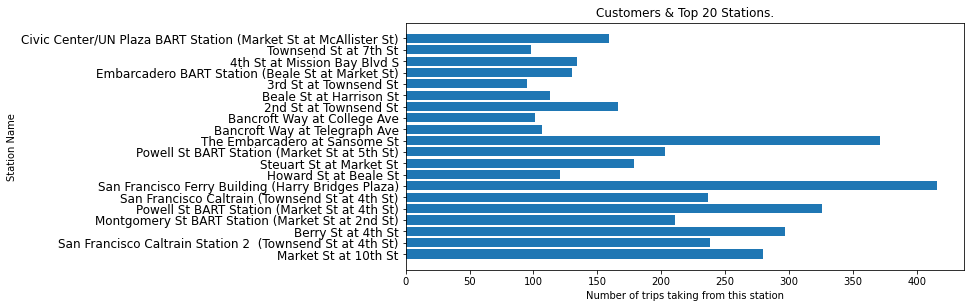

In [540]:
plt.figure(figsize = [10, 10]) 
plt.subplot(2, 1, 2)
plt.barh(x,df_cust[x],color=sb.color_palette()[0])
plt.yticks(fontsize=12)
plt.title('Customers & Top 20 Stations.')
plt.xlabel('Number of trips taking from this station')
plt.ylabel('Station Name');

The Top station for Customers is Howard St at Beale St <br/>
The Top station for Subscriber is Market ST at 10th St <br/> 

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


The Male gender is most using bick trip. They are subscriber and they  usually use bick in weekend. Also, Duration trip decreases when age increses as excpected.<br/>




# Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

The relationship between user type and most frequent station name: <br/>
The Top station for Customers is Howard St at Beale St <br/>
The Top station for Subscriber is Market ST at 10th St <br> 
most of the users are Subscriber so, that Market ST at 10th St is top .

# Multivariate Exploration (plots of three or more variables)

**Trip Duration with trip day and member gender**

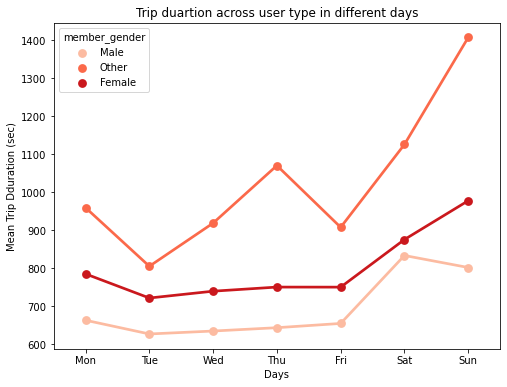

In [541]:
fig = plt.figure(figsize = [8,6])
cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

sb.pointplot(data = ford_clean, x = 'trip_day', y = 'duration_sec', order = cat_order,hue = 'member_gender', palette = 'Reds', ci=None)
plt.title('Trip duartion across user type in different days')
plt.ylabel('Mean Trip Dduration (sec)')
plt.xlabel('Days')
plt.show();


The other spend more time per trip more than the males and female in all day. Then females  have longer trips.



**User type and member gender with trip day**

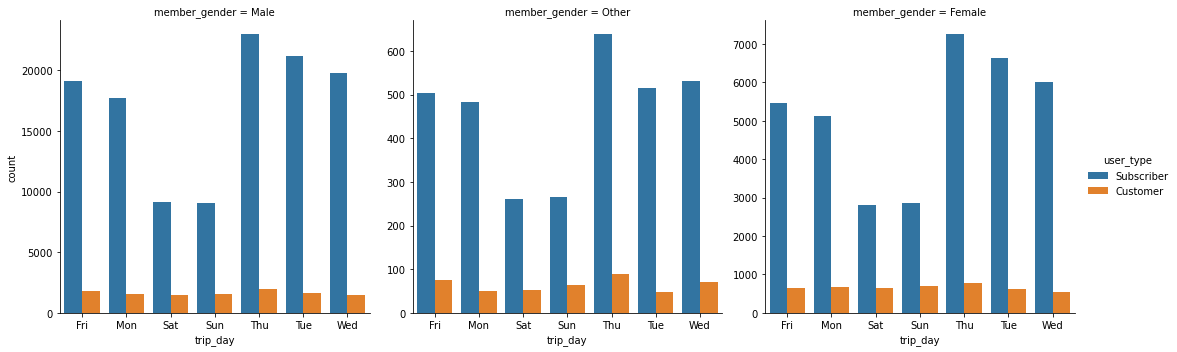

In [542]:
sb.catplot(data=ford_clean, x='trip_day', col='member_gender',hue='user_type',kind='count', sharey=False)

Subscribers mostaly use bick on weekday espicily in  thursday for all gender but in weekend they rarely useing bick.

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


The multivariate exploration improve some of find out in the previous sections (bivariate exploration, univariate exploration),the Subscribers mostaly use bick on weekday . They may be use the trip for working .


# Were there any interesting or surprising interactions between features?


The interactions between features are supporting each other.There is big suprising for me the other gender spend more time per trip on aday.